In [232]:
import pandas as pd

file_1 = pd.read_csv('C:/Users/zzaer/OneDrive/바탕 화면/2025 채린/아러다/train.csv')
file_2 = pd.read_csv('C:/Users/zzaer/OneDrive/바탕 화면/2025 채린/아러다/test.csv')

In [233]:
# 결측치 처리

In [234]:
# device_distinct_emails_8w
# 크게 영향을 끼치지 않을 정도로 결측치 값이 너무 적음. 
# 주로 1과 2 중에서 최빈값인 1로 처리함.

file_1['device_distinct_emails_8w'] = file_1['device_distinct_emails_8w'].fillna(1) # 최빈값인 1로 처리
file_2['device_distinct_emails_8w'] = file_2['device_distinct_emails_8w'].fillna(1) # 최빈값인 1로 처리

In [235]:
# session_length_in_minutes
# 평균값으로 대체 

mean_val = file_1['session_length_in_minutes'].mean()
file_1['session_length_in_minutes'] = file_1['session_length_in_minutes'].fillna(mean_val)

mean_val = file_2['session_length_in_minutes'].mean()
file_2['session_length_in_minutes'] = file_2['session_length_in_minutes'].fillna(mean_val)

In [ ]:
# current_address_months_count  
# 평균균값으로 대체

mean_val = file_1['current_address_months_count'].mean()
file_1['current_address_months_count'] = file_1['current_address_months_count'].fillna(mean_val)

mean_val = file_2['current_address_months_count'].mean()
file_2['current_address_months_count'] = file_2['current_address_months_count'].fillna(mean_val)

In [237]:
# bank_months_count
# 사기인 경우와 사기가 아닌 경우를 나누어, 평균, 표준편차를 구하여 조건부 랜덤 샘플링 기반 결측 대체 방벙블 사용함 

fraud_mean = file_1[file_1['fraud'] == 1]['bank_months_count'].mean()
nonfraud_mean = file_1[file_1['fraud'] == 0]['bank_months_count'].mean()

print(f"사기인 경우 평균: {fraud_mean:.2f}")
print(f"사기가 아닌 경우 평균: {nonfraud_mean:.2f}")
fraud_stats = file_1[file_1['fraud'] == 1]['bank_months_count'].agg(['mean', 'std'])
nonfraud_stats = file_1[file_1['fraud'] == 0]['bank_months_count'].agg(['mean', 'std'])

print(f"사기인 경우 → 평균: {fraud_stats['mean']:.2f}, 표준편차: {fraud_stats['std']:.2f}")
print(f"사기 아닌 경우 → 평균: {nonfraud_stats['mean']:.2f}, 표준편차: {nonfraud_stats['std']:.2f}")

사기인 경우 평균: 17.33
사기가 아닌 경우 평균: 14.84
사기인 경우 → 평균: 17.33, 표준편차: 11.84
사기 아닌 경우 → 평균: 14.84, 표준편차: 11.52


In [238]:
import numpy as np

cond_missing = file_1['bank_months_count'].isna()

# fraud==1 기준 평균±표준편차
fraud_mean = 17.33
fraud_std = 11.84

# fraud==0 기준 평균±표준편차
nonfraud_mean = 14.84
nonfraud_std = 11.52

# 랜덤 생성 함수
def sample_from_normal(mean, std, size):
    return np.clip(np.random.normal(mean, std, size), 0, None)

# 사기인 경우
fraud_mask = cond_missing & (file_1['fraud'] == 1)
file_1.loc[fraud_mask, 'bank_months_count'] = sample_from_normal(fraud_mean, fraud_std, fraud_mask.sum())

# 사기 아닌 경우
nonfraud_mask = cond_missing & (file_1['fraud'] == 0)
file_1.loc[nonfraud_mask, 'bank_months_count'] = sample_from_normal(nonfraud_mean, nonfraud_std, nonfraud_mask.sum())

In [239]:
import numpy as np

# train에서 구한 평균과 표준편차
fraud_mean = 17.33
fraud_std = 11.84

nonfraud_mean = 14.84
nonfraud_std = 11.52

# train에서 사기 비율
fraud_ratio = file_1['fraud'].mean()
nonfraud_ratio = 1 - fraud_ratio

# 전체 가중 평균과 표준편차
overall_mean = fraud_mean * fraud_ratio + nonfraud_mean * nonfraud_ratio
overall_std = fraud_std * fraud_ratio + nonfraud_std * nonfraud_ratio

# test 결측치 채우기
def sample_from_normal(mean, std, size):
    return np.clip(np.random.normal(mean, std, size), 0, None)

cond_missing_test = file_2['bank_months_count'].isna()
file_2.loc[cond_missing_test, 'bank_months_count'] = sample_from_normal(overall_mean, overall_std, cond_missing_test.sum())


In [240]:
# initial_transfer_amount
# 결측치 너무 많아서 그냥 제거

file_1 = file_1.drop(columns=['initial_transfer_amount'])
file_2 = file_2.drop(columns=['initial_transfer_amount'])

In [241]:
# prev_address_months_count
# 결측치 너무 많아서 그냥 제거 

file_1 = file_1.drop(columns=['prev_address_months_count'])
file_2 = file_2.drop(columns=['prev_address_months_count'])

In [242]:
file_1.isnull().sum()

id                                  0
bank_months_count                   0
branch_application_count_8weeks     0
credit_risk_score                   0
current_address_months_count        0
customer_age                        0
date_of_birth_distinct_emails_4w    0
days_since_request                  0
device_distinct_emails_8w           0
device_os                           0
device_previously_fraudulent        0
email_is_free                       0
employment_status                   0
foreign_request                     0
has_other_cards                     0
housing_status                      0
income                              0
keep_alive_session                  0
month                               0
name_email_similarity               0
payment_type                        0
phone_home_valid                    0
phone_mobile_valid                  0
requested_credit_limit              0
session_length_in_minutes           0
source                              0
velocity_24h

In [243]:
file_2.isnull().sum()

id                                  0
bank_months_count                   0
branch_application_count_8weeks     0
credit_risk_score                   0
current_address_months_count        0
customer_age                        0
date_of_birth_distinct_emails_4w    0
days_since_request                  0
device_distinct_emails_8w           0
device_os                           0
device_previously_fraudulent        0
email_is_free                       0
employment_status                   0
foreign_request                     0
has_other_cards                     0
housing_status                      0
income                              0
keep_alive_session                  0
month                               0
name_email_similarity               0
payment_type                        0
phone_home_valid                    0
phone_mobile_valid                  0
requested_credit_limit              0
session_length_in_minutes           0
source                              0
velocity_24h

In [244]:
file_2.head()

,id,bank_months_count,branch_application_count_8weeks,credit_risk_score,current_address_months_count,customer_age,date_of_birth_distinct_emails_4w,days_since_request,device_distinct_emails_8w,device_os,...,payment_type,phone_home_valid,phone_mobile_valid,requested_credit_limit,session_length_in_minutes,source,velocity_24h,velocity_4w,velocity_6h,zip_count_4w
0,0,26.000000,11.0,25,81.0,30,12,10.05,1.0,other,...,AA,False,True,200.0,0.9,INTERNET,6297.90,5647.48,13882.70,1161
1,1,7.330624,0.0,138,11.0,50,5,0.02,1.0,windows,...,AC,True,True,500.0,7.8,INTERNET,4282.20,5369.74,6667.63,2236
2,2,28.000000,1883.0,162,15.0,10,4,0.01,1.0,linux,...,AA,False,True,200.0,29.0,INTERNET,8751.22,5048.42,7576.66,2450
3,3,30.000000,29.0,58,134.0,40,4,0.02,1.0,windows,...,AB,True,True,200.0,2.3,INTERNET,4074.20,6697.37,1863.00,1733
4,4,28.000000,10.0,65,3.0,20,6,0.02,1.0,other,...,AA,False,True,200.0,8.2,INTERNET,5118.08,4321.08,10149.49,227


In [245]:
# One-Hot Encoding 대상 (drop_first=True로 다중공선성 방지)
onehot_cols = ['device_os', 'employment_status', 'housing_status', 'payment_type']

# Binary Encoding 대상
binary_map = {'INTERNET': 0, 'TELEAPP': 1}

# 1. One-Hot 인코딩
file_1 = pd.get_dummies(file_1, columns=onehot_cols, drop_first=True)

# 2. Binary 인코딩 (source)
file_1['source'] = file_1['source'].map(binary_map)

# 3. Boolean 컬럼은 이미 0/1 형태이므로 변환 불필요
# 단, 필요시 int로 명확히 변환하고 싶다면 아래처럼도 가능
bool_cols = ['email_is_free', 'foreign_request', 'has_other_cards',
             'keep_alive_session', 'phone_home_valid', 'phone_mobile_valid']

file_1[bool_cols] = file_1[bool_cols].astype(int)


In [246]:
# One-Hot Encoding 대상 (drop_first=True로 다중공선성 방지)
onehot_cols = ['device_os', 'employment_status', 'housing_status', 'payment_type']

# Binary Encoding 대상
binary_map = {'INTERNET': 0, 'TELEAPP': 1}

# 1. One-Hot 인코딩 (train과 test 모두 동일하게 처리)
file_2 = pd.get_dummies(file_2, columns=onehot_cols, drop_first=True)

# 2. Binary 인코딩 (source)
file_2['source'] = file_2['source'].map(binary_map)

# 3. Boolean 컬럼은 이미 0/1 형태이므로 변환 불필요
# 단, 필요시 int로 명확히 변환하고 싶다면 아래처럼도 가능
bool_cols = ['email_is_free', 'foreign_request', 'has_other_cards',
             'keep_alive_session', 'phone_home_valid', 'phone_mobile_valid']

file_2[bool_cols] = file_2[bool_cols].astype(int)


In [ ]:
---여기까지---

In [247]:
from sklearn.model_selection import train_test_split

X = file_1.drop("fraud", axis=1)
y = file_1["fraud"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [216]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, average_precision_score

# 데이터 분할 (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 랜덤포레스트 모델 정의
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ap_score = average_precision_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Average Precision Score: {ap_score:.4f}')


Accuracy: 0.9889
F1 Score: 0.0000
Average Precision Score: 0.0111


In [249]:
# class_weight='balanced' 로 불균형 보정
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=100, class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# 평가
from sklearn.metrics import f1_score, average_precision_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("Average Precision Score:", average_precision_score(y_test, clf.predict_proba(x_test)[:, 1]))


Accuracy: 0.9889142857142857
F1 Score: 0.002570694087403599
Average Precision Score: 0.09832244217754396


In [217]:
from sklearn.model_selection import train_test_split

# X는 fraud 칼럼을 제외한 모든 변수, y는 타겟
X = file_1.drop("fraud", axis=1)
y = file_1["fraud"]

# 훈련/검증 셋 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [222]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, classification_report
X_train, X_val, y_train, y_val = train_test_split(final_X, final_y, test_size=0.2, random_state=42, stratify=final_y)


In [223]:
model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    class_weight='balanced'  # 불균형 완화용
)

model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 4973, number of negative: 49727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3183
[LightGBM] [Info] Number of data points in the train set: 54700, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=7,
               random_state=42)

In [224]:
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)

# Average Precision Score (PR Curve 기준)
ap_score = average_precision_score(y_val, y_pred_proba)
print(f"Average Precision (AP): {ap_score:.4f}")

# 추가로 정확도, F1 등도 보고 싶다면:
print(classification_report(y_val, y_pred, digits=4))


Average Precision (AP): 0.9444
              precision    recall  f1-score   support

           0     0.9903    0.9877    0.9890     12433
           1     0.8801    0.9035    0.8916      1243

    accuracy                         0.9800     13676
   macro avg     0.9352    0.9456    0.9403     13676
weighted avg     0.9803    0.9800    0.9802     13676



In [225]:
# 1. One-hot encoding 전체에서 누락된 열을 추가
missing_cols = set(final_X.columns) - set(file_2.columns)
for col in missing_cols:
    file_2[col] = 0  # 없는 열은 0으로 채움

# 2. 열 순서 동일하게 맞추기
test_x = file_2[final_X.columns]


In [226]:
# test_x를 train과 동일한 피처로 구성
test_x = file_2[final_X.columns]  # final_X는 학습에 사용한 X

# 예측
test_pred = model.predict(test_x)

# 길이 체크
print("예측 개수:", len(test_pred))
print("제출용 ID 개수:", len(pd.read_csv("sample_submission.csv")))


예측 개수: 300000
제출용 ID 개수: 300000


In [227]:
# 예측 확률과 결과
test_pred_proba = model.predict_proba(test_x)[:, 1]
test_pred = model.predict(test_x)

# 제출 템플릿 불러오기 (test와 행 수 일치하는지 확인!)
submit = pd.read_csv("C:/Users/zzaer/OneDrive/바탕 화면/2025 채린/아러다/sample_submission.csv")
print(submit.shape)  # <-- 이게 test_pred와 길이 같아야 함

# 결과 저장
submit["fraud"] = test_pred
submit.to_csv("sample_submission.csv", index=False)



(300000, 2)


In [250]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
from sklearn.model_selection import train_test_split


In [251]:
# file_1: 학습 데이터 (이미 결측치 처리 및 인코딩 완료되었다고 가정)
final_X = file_1.drop(columns=['fraud'])  # feature
final_y = file_1['fraud']                 # target (label)


In [252]:
x_train, x_test, y_train, y_test = train_test_split(
    final_X, final_y, test_size=0.2, random_state=42, stratify=final_y
)


In [253]:
smote = SMOTE(random_state=42, sampling_strategy=1.0)  # 1.0 = minority 클래스 수를 majority와 같게
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


c:\Users\zzaer\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [254]:
clf = RandomForestClassifier(random_state=100)
clf.fit(x_resampled, y_resampled)


RandomForestClassifier(random_state=100)

In [255]:
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Average Precision Score:", average_precision_score(y_test, y_pred_proba))


Accuracy: 0.9865571428571429
F1 Score: 0.08729388942774007
Average Precision Score: 0.07267379315626091


In [256]:
test_x = file_2[final_X.columns]  # 학습에 사용한 피처들과 동일하게 구성
test_pred = clf.predict(test_x)

submit = pd.read_csv("sample_submission.csv")
submit["fraud"] = test_pred
submit.to_csv("submission_smote_rf.csv", index=False)


In [257]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    class_weight='balanced',  # 불균형 자동 보정
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)


In [259]:
from lightgbm import LGBMClassifier

# 모델 선언
model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# 모델 학습
model.fit(X_train, y_train)  # 여기가 꼭 필요함 ✅

# 예측
y_pred = model.predict(X_test)


[LightGBM] [Info] Number of positive: 6216, number of negative: 553784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [260]:
from sklearn.metrics import precision_recall_curve

y_proba = model.predict_proba(X_val)[:, 1]
prec, recall, thresholds = precision_recall_curve(y_val, y_proba)

# AP 최댓값 기준 threshold 설정
import numpy as np
f1_scores = 2 * prec * recall / (prec + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]


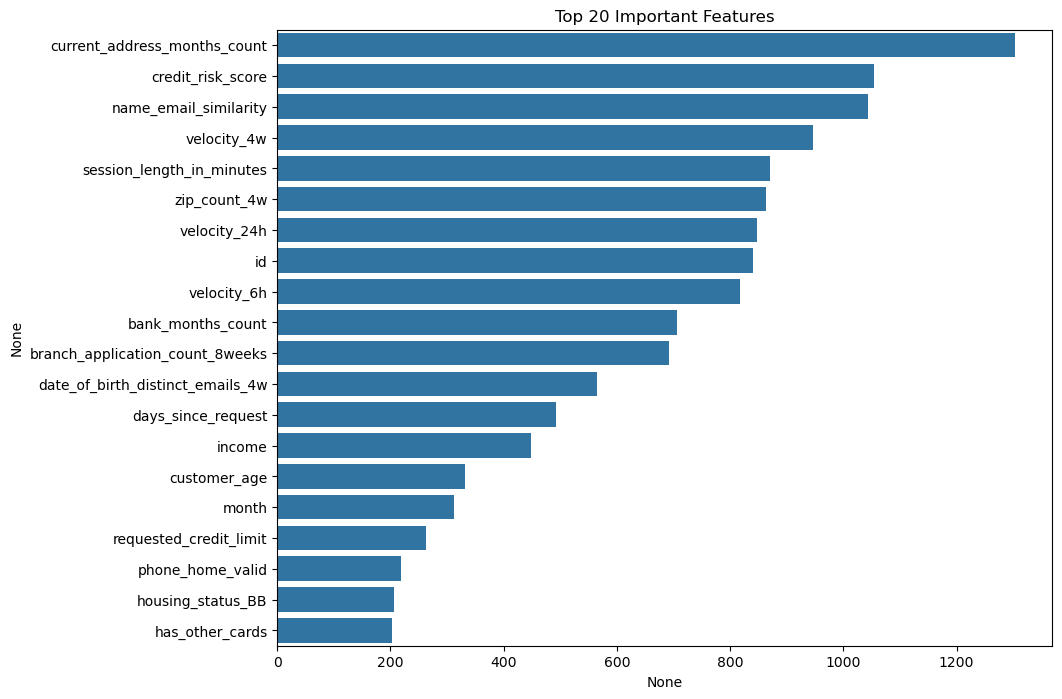

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_names = final_X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feat_imp[:20], y=feat_imp[:20].index)
plt.title("Top 20 Important Features")
plt.show()


In [262]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, final_X, final_y, cv=5, scoring='average_precision')
print("Cross-validated AP:", np.mean(scores))


[LightGBM] [Info] Number of positive: 6216, number of negative: 553784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 6216, number of negative: 553784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 45
[LightGBM] [Info